In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


In [2]:
sns.set(
    font_scale=2, 
    style='whitegrid',
    rc={'figure.figsize':(20,7)}
)

In [3]:
avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date'])

In [4]:
avocado_mean

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

In [5]:
avocado_mean.rolling(window=3).mean()

Date
2015-01-04         NaN
2015-01-11         NaN
2015-01-18    1.354352
2015-01-25    1.386296
2015-02-01    1.345093
                ...   
2018-02-25    1.346914
2018-03-04    1.361296
2018-03-11    1.348302
2018-03-18    1.332994
2018-03-25    1.331883
Name: AveragePrice, Length: 169, dtype: float64

In [6]:
avocado_mean.rolling(window=3).mean().max()

1.8493209876543204

In [7]:
avocado_mean.rolling(window=3).mean().max().round(2)

1.85

In [8]:
a2 = avocado_mean.rolling(2).mean()

In [9]:
a2

Date
2015-01-04         NaN
2015-01-11    1.335972
2015-01-18    1.380880
2015-01-25    1.394120
2015-02-01    1.322083
                ...   
2018-02-25    1.366852
2018-03-04    1.354907
2018-03-11    1.342639
2018-03-18    1.324398
2018-03-25    1.330278
Name: AveragePrice, Length: 169, dtype: float64

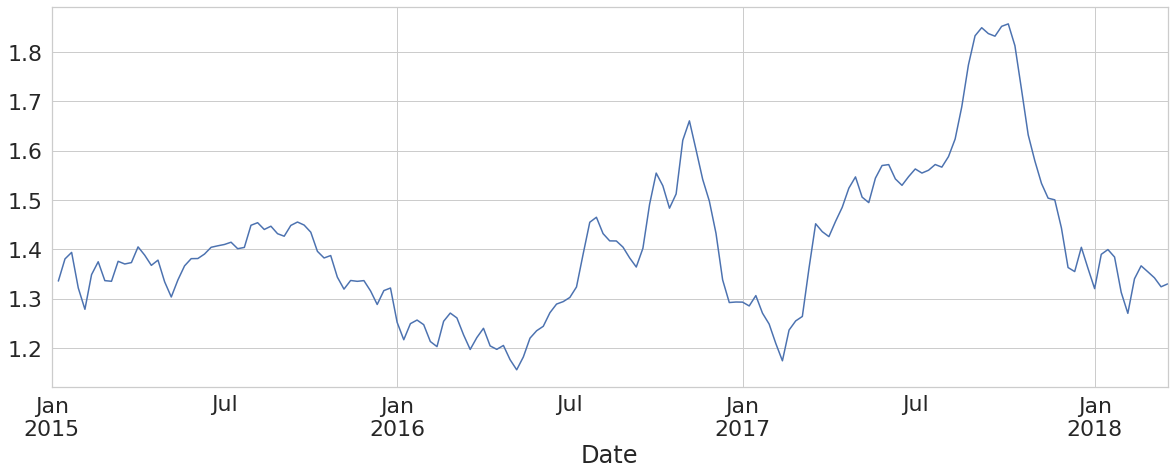

In [10]:
a2.plot()

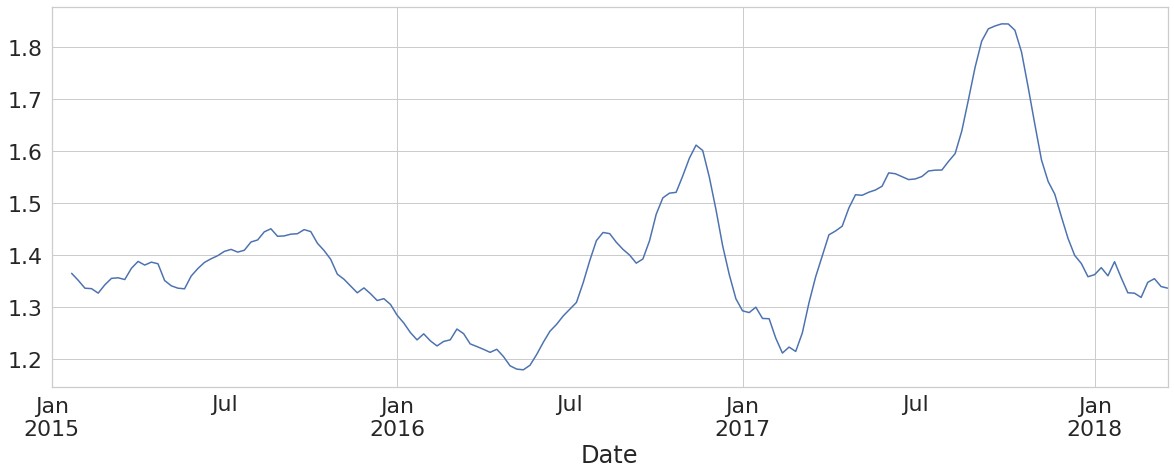

In [11]:
a4 = avocado_mean.rolling(4).mean().plot()

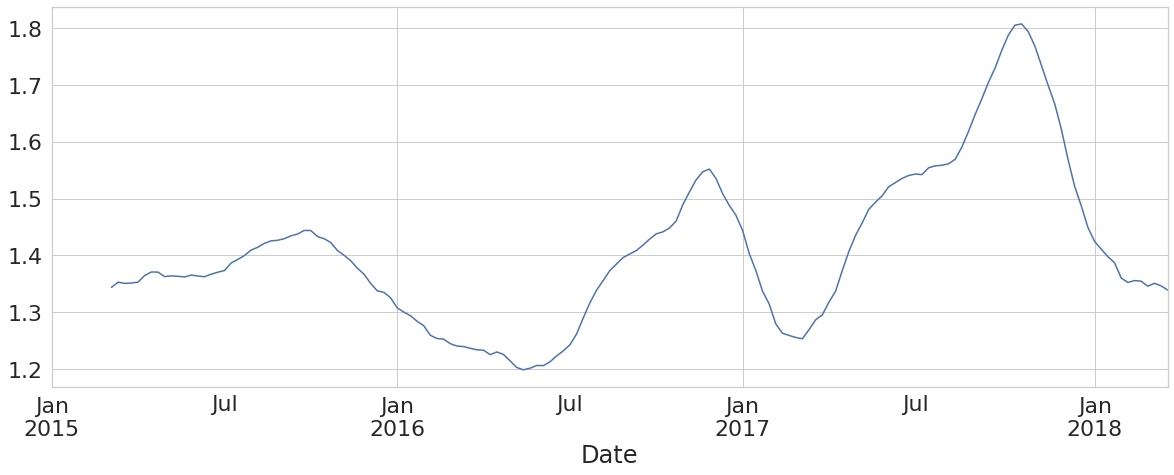

In [12]:
a10 = avocado_mean.rolling(10).mean().plot()

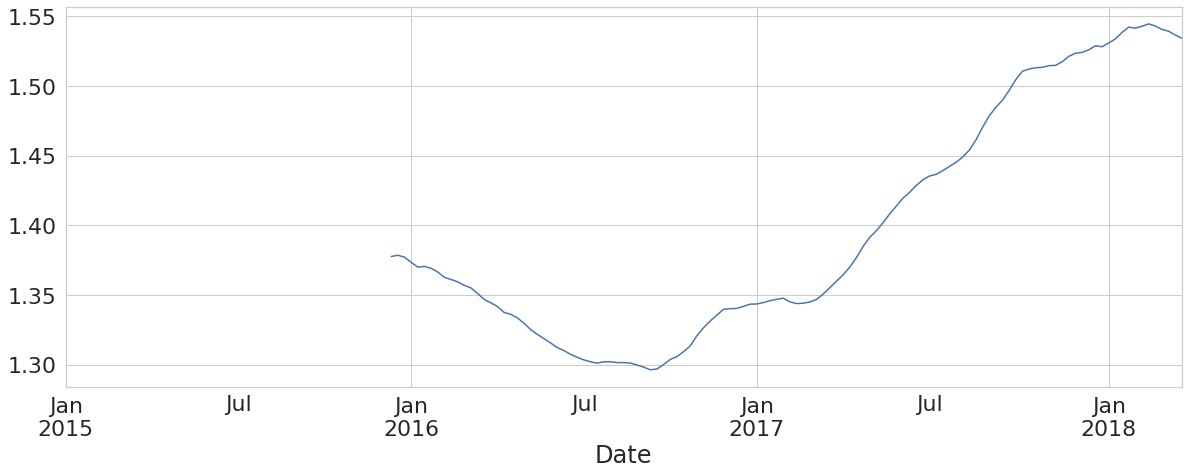

In [13]:
a50 = avocado_mean.rolling(50).mean().plot()

In [14]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

In [15]:
avocado_ewm

Date
2015-01-04    1.301296
2015-01-11    1.353310
2015-01-18    1.379480
2015-01-25    1.391394
2015-02-01    1.294758
                ...   
2018-02-25    1.356212
2018-03-04    1.352194
2018-03-11    1.340793
2018-03-18    1.322734
2018-03-25    1.338812
Name: AveragePrice, Length: 169, dtype: float64

In [16]:
avocado_full = pd.read_csv('avocado_full.csv',index_col=0)

In [17]:
avocado_full

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [18]:
chicago_organic = avocado_full.query('type == "organic" & region == "Chicago"')

In [19]:
chicago_organic.reset_index().head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.0,0.0,organic,2015,Chicago
1,2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.0,0.0,organic,2015,Chicago
2,2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.0,0.0,organic,2015,Chicago
3,2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.0,0.0,organic,2015,Chicago
4,2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.0,0.0,organic,2015,Chicago


In [20]:
chicago_organic['Win4'] = chicago_organic.AveragePrice.rolling(4).mean().round(3)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
chicago_organic.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Win4
Date,,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.0,0.0,organic,2015,Chicago,NaN
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.0,0.0,organic,2015,Chicago,NaN
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.0,0.0,organic,2015,Chicago,NaN
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.0,0.0,organic,2015,Chicago,1.730
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.0,0.0,organic,2015,Chicago,1.737


In [22]:
win4 = chicago_organic.AveragePrice.rolling(4).mean().round(3)

In [23]:
win4

Date
2015-01-04      NaN
2015-01-11      NaN
2015-01-18      NaN
2015-01-25    1.730
2015-02-01    1.737
              ...  
2018-02-25    1.652
2018-03-04    1.652
2018-03-11    1.655
2018-03-18    1.655
2018-03-25    1.657
Name: AveragePrice, Length: 169, dtype: float64

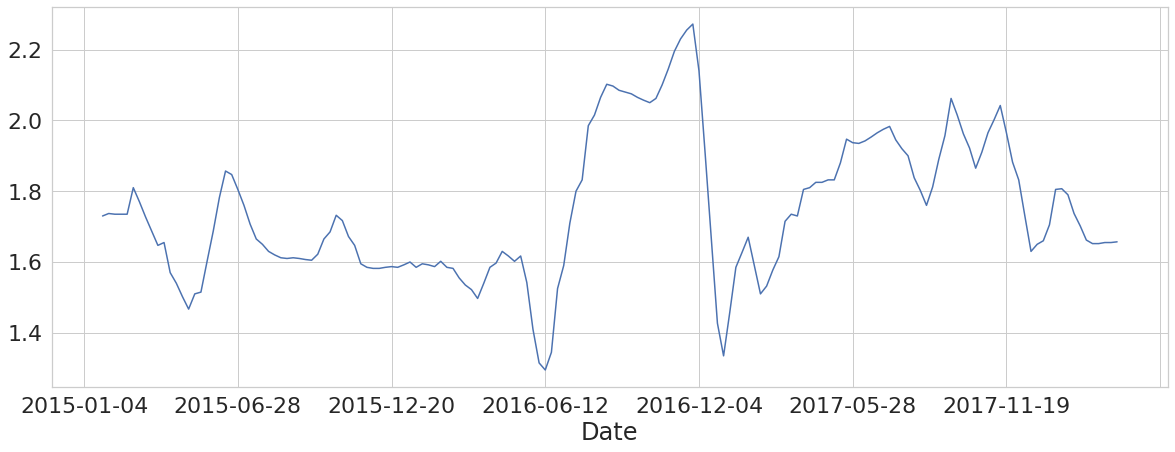

In [24]:
a_win4 = win4.plot()

In [25]:
chicago_organic['Exp'] = chicago_organic.AveragePrice.ewm(span=4).mean().round(3)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
exp = chicago_organic.AveragePrice.ewm(span=4).mean().round(3)

In [27]:
exp

Date
2015-01-04    1.490
2015-01-11    1.678
2015-01-18    1.745
2015-01-25    1.784
2015-02-01    1.670
              ...  
2018-02-25    1.677
2018-03-04    1.654
2018-03-11    1.656
2018-03-18    1.658
2018-03-25    1.671
Name: AveragePrice, Length: 169, dtype: float64

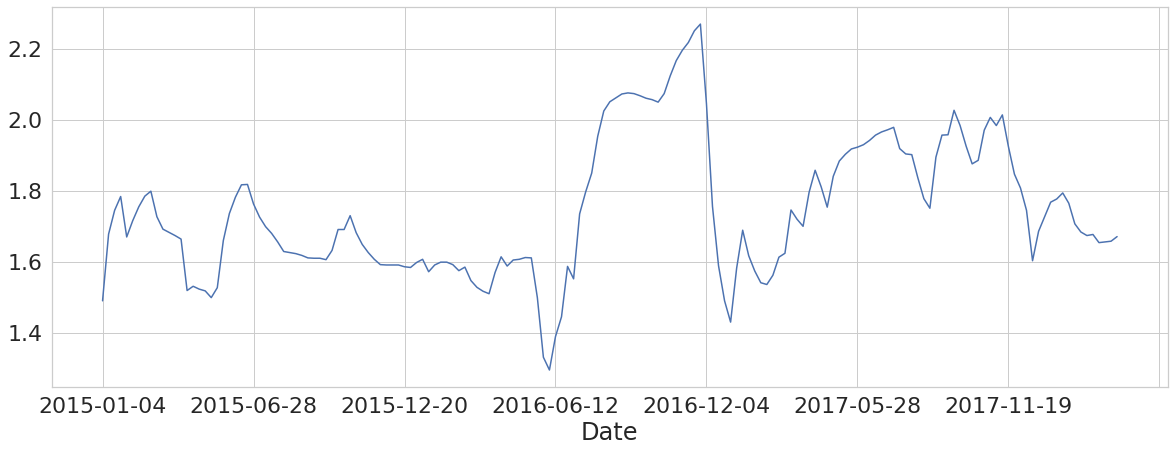

In [28]:
a_exp = exp.plot()

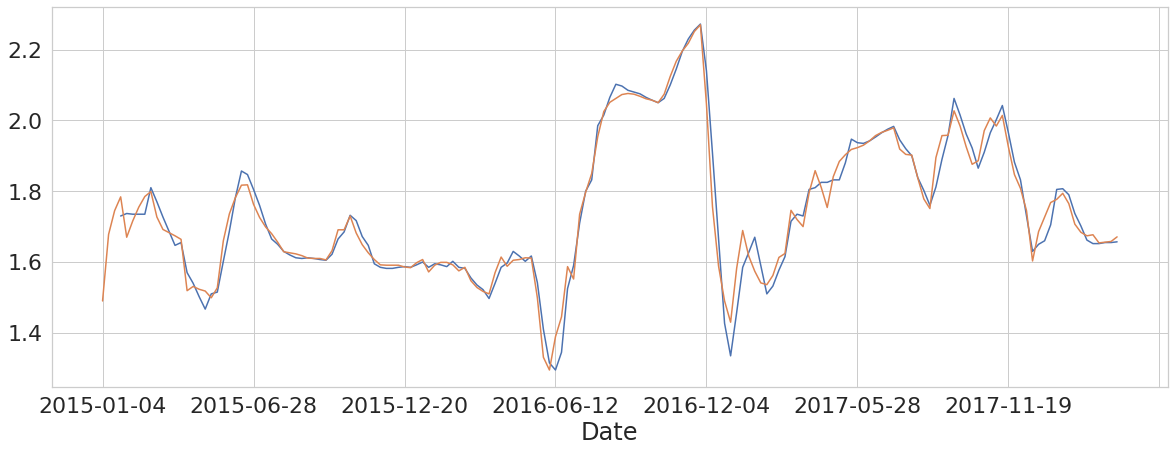

In [29]:
a_win4 = win4.plot()
a_exp = exp.plot()

In [30]:
chicago_organic.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Win4,Exp
Date,,,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.0,0.0,organic,2015,Chicago,NaN,1.490
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.0,0.0,organic,2015,Chicago,NaN,1.678
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.0,0.0,organic,2015,Chicago,NaN,1.745
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.0,0.0,organic,2015,Chicago,1.730,1.784
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.0,0.0,organic,2015,Chicago,1.737,1.670


In [31]:
chicago_organic.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Win4            float64
Exp             float64
dtype: object

In [33]:
chicago_organic = chicago_organic.reset_index()

In [34]:
chicago_organic.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Win4            float64
Exp             float64
dtype: object

In [35]:
chicago_organic['Date'] = pd.to_datetime(chicago_organic.Date)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


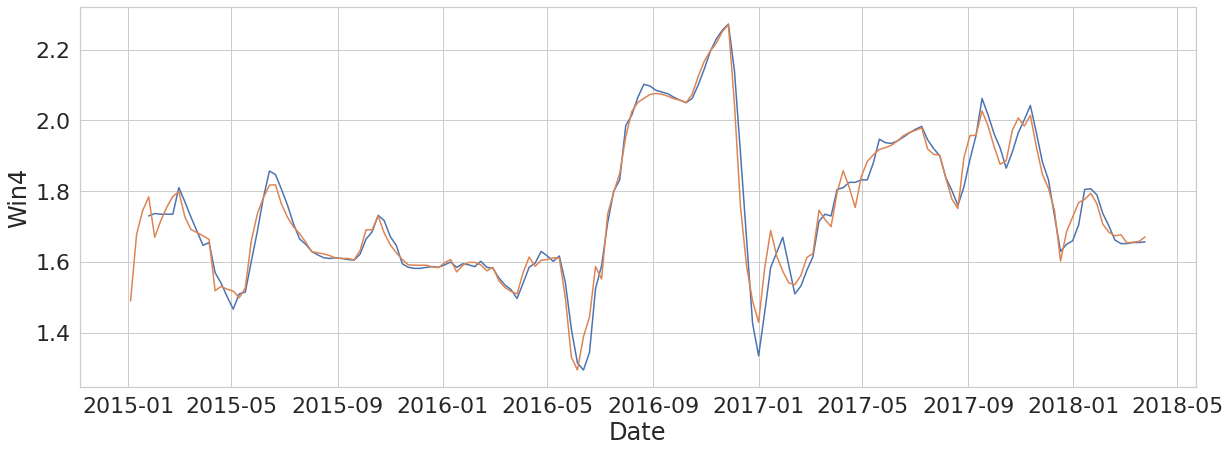

In [37]:
sns.lineplot(chicago_organic.Date, chicago_organic.Win4)
sns.lineplot(chicago_organic.Date, chicago_organic.Exp)

In [39]:
px.line(chicago_organic, x='Date', y='Win4').show()
px.line(chicago_organic, x='Date', y='Exp').show()

In [40]:
import pandas as pd

In [45]:
df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-kazantseva-40/shared/hall_of_fame/delays.csv")

In [46]:
df.head()

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844


In [49]:
df.delay = df.delay.str.replace('-', '')

In [50]:
df.head()

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48.000000000,705436
1,7614,9544,4 days 02:14:23.000000000,859266
2,2052,2427,0 days 06:08:57.000000000,812416
3,9635,8054,0 days 23:40:19.000000000,162312
4,8154,5503,1 days 13:21:53.000000000,658844


In [51]:
df.delay = pd.to_timedelta(df.delay)

In [54]:
df['delay_categorical'] = pd.cut(df.delay, bins=3)

In [55]:
df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


In [57]:
df['delay_categorical'] = pd.cut(df.delay,
                                 pd.to_timedelta(['0d', '1d', '2d', '3d', '106751d']),
                                 labels=['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days'])

In [60]:
df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


In [68]:
df_search = df.groupby('delay_categorical', as_index=False) \
    .agg({'client_id' : 'count'}) \

In [69]:
df_search

,delay_categorical,client_id
0,less than 1 day,59
1,1-2 days,51
2,2-3 days,47
3,more than 3 days,107


In [70]:
import plotly.express as px

a = px.bar(x=df_search.delay_categorical, y=df_search.client_id)

In [71]:
a